# C.2. Exercises and Solutions

## Module C: Options

### DRW New-Hire Learning Program

#### Summer 2022

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu


### Instructions

* Work on this individually or with your colleagues. No assigned groups.
* We encourage you to do more on the problems in the afternoon/evening.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from options import *

In [2]:
## Market variables
r = .02
sigma = .30
So = 100

## Contract
T = .5
K = 110
funPayoff = lambda x: np.maximum(K-x,0)

## Solving variable
Nt = 2
dt = T/Nt

In [3]:
tree, treeinfo = treeUnder(So,T,Nt,sigma=sigma)

tree.style.format('{:.2f}')

,0,1,2
0,100.00,116.18,134.99
1,nan,86.07,100.00
2,nan,nan,74.08


In [4]:
rates = r * np.ones(Nt)

Z = np.exp(-rates*dt)
A = np.exp(rates * dt)

pstar = (A - treeinfo.d)/(treeinfo.u-treeinfo.d)

print(f'Risk-neutral probability: {pstar[0]:.2%}')

Risk-neutral probability: 47.92%


In [5]:
treeV = treeAsset(funPayoff,tree,treeinfo,Z=Z,pstar=pstar)
treeV.style.format('{:.2f}')

,0,1,2
0,14.59,5.18,0.00
1,nan,23.38,10.00
2,nan,nan,35.92


## American Option

In [6]:
STYLE = 'american'
treeVamer, treeExer = treeAsset(funPayoff,tree,treeinfo,Z=Z,pstar=pstar,style='american')
treeVamer.style.format('{:.2f}')

,0,1,2
0,14.87,5.18,0.00
1,nan,23.93,10.00
2,nan,nan,35.92


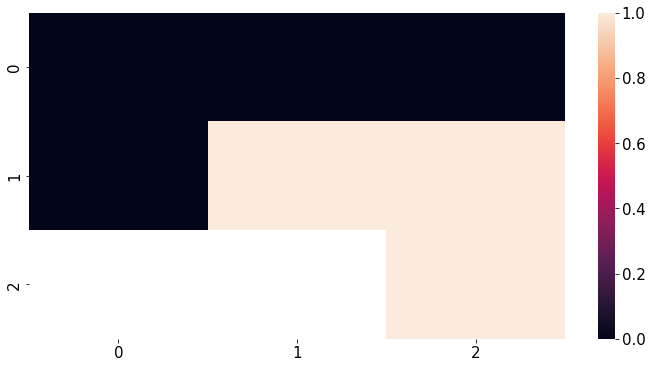

In [7]:
sns.heatmap(treeExer.astype(float));

In [8]:
f0BS = bs_price(under=So,strike=K,T=T,rf=r,vol=sigma,option='put')

pd.DataFrame([f0BS,treeV.iloc[0,0],treeVamer.iloc[0,0]],columns=['value'],index=['BS value','tree value','American']).style.format('{:.4f}')

,value
BS value,13.9767
tree value,14.5863
American,14.8706


# More Nodes

## Assignment Question

In [9]:
## Market variables
r = .02
sigma = .30
So = 100

## Contract
T = .5
K = 110
funPayoff = lambda x: np.maximum(K-x,0)

## Solving variable
Nt = 30
dt = T/Nt

In [10]:
tree, treeinfo = treeUnder(So,T,Nt,sigma=sigma)
tree.head().style.format('{:.2f}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,100.00,103.95,108.05,112.32,116.76,121.37,126.16,131.14,136.32,141.70,147.30,153.12,159.16,165.45,171.98,178.77,185.83,193.17,200.80,208.73,216.97,225.54,234.45,243.70,253.33,263.33,273.73,284.54,295.78,307.46,319.60
1,nan,96.20,100.00,103.95,108.05,112.32,116.76,121.37,126.16,131.14,136.32,141.70,147.30,153.12,159.16,165.45,171.98,178.77,185.83,193.17,200.80,208.73,216.97,225.54,234.45,243.70,253.33,263.33,273.73,284.54,295.78
2,nan,nan,92.55,96.20,100.00,103.95,108.05,112.32,116.76,121.37,126.16,131.14,136.32,141.70,147.30,153.12,159.16,165.45,171.98,178.77,185.83,193.17,200.80,208.73,216.97,225.54,234.45,243.70,253.33,263.33,273.73
3,nan,nan,nan,89.03,92.55,96.20,100.00,103.95,108.05,112.32,116.76,121.37,126.16,131.14,136.32,141.70,147.30,153.12,159.16,165.45,171.98,178.77,185.83,193.17,200.80,208.73,216.97,225.54,234.45,243.70,253.33
4,nan,nan,nan,nan,85.65,89.03,92.55,96.20,100.00,103.95,108.05,112.32,116.76,121.37,126.16,131.14,136.32,141.70,147.30,153.12,159.16,165.45,171.98,178.77,185.83,193.17,200.80,208.73,216.97,225.54,234.45


In [11]:
rates = r * np.ones(Nt)

Z = np.exp(-rates*dt)
A = np.exp(rates * dt)

pstar = (A - treeinfo.d)/(treeinfo.u-treeinfo.d)

print(f'Risk-neutral probability: {pstar[0]:.2%}')

Risk-neutral probability: 49.46%


In [12]:
treeV = treeAsset(funPayoff,tree,treeinfo,Z=Z,pstar=pstar)
treeV.head().style.format('{:.2f}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,14.00,11.59,9.36,7.35,5.59,4.09,2.86,1.90,1.19,0.69,0.37,0.18,0.07,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,nan,16.37,13.77,11.33,9.08,7.05,5.29,3.80,2.60,1.68,1.01,0.56,0.28,0.12,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,nan,nan,18.91,16.17,13.54,11.07,8.79,6.75,4.98,3.51,2.34,1.45,0.83,0.43,0.20,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,nan,nan,nan,21.61,18.76,15.98,13.30,10.79,8.48,6.43,4.66,3.20,2.06,1.23,0.66,0.32,0.13,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,nan,nan,nan,nan,24.41,21.49,18.60,15.77,13.06,10.50,8.16,6.08,4.32,2.88,1.78,1.00,0.50,0.21,0.07,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### American Option

In [13]:
STYLE = 'american'
treeVamer, treeExer = treeAsset(funPayoff,tree,treeinfo,Z=Z,pstar=pstar,style='american')
treeVamer.head().style.format('{:.2f}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,14.18,11.72,9.46,7.42,5.64,4.12,2.89,1.92,1.20,0.70,0.37,0.18,0.07,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,nan,16.59,13.94,11.46,9.17,7.12,5.34,3.84,2.62,1.69,1.02,0.56,0.28,0.12,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,nan,nan,19.19,16.38,13.70,11.19,8.88,6.81,5.02,3.54,2.35,1.47,0.84,0.43,0.20,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,nan,nan,nan,21.94,19.02,16.18,13.46,10.90,8.56,6.48,4.70,3.23,2.08,1.24,0.67,0.32,0.13,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,nan,nan,nan,nan,24.81,21.81,18.85,15.96,13.20,10.61,8.24,6.14,4.35,2.90,1.80,1.01,0.50,0.21,0.07,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
f0BS = bs_price(under=So,strike=K,T=T,rf=r,vol=sigma,option='put')

pd.DataFrame([f0BS,treeV.iloc[0,0],treeVamer.iloc[0,0]],columns=['value'],index=['BS value','tree value','American']).style.format('{:.4f}')

,value
BS value,13.9767
tree value,13.9967
American,14.1760


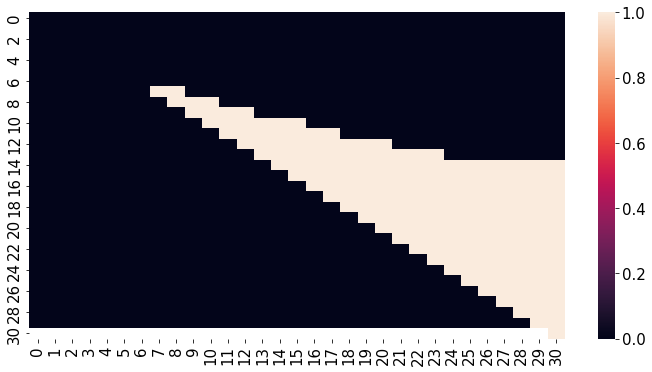

In [15]:
sns.heatmap(treeExer.astype(float));

## Example from C.2 Note

In [16]:
## Market variables
r = .05
sigma = .25
So = 50

## Contract
T = 2
K = 55
funPayoff = lambda x: np.maximum(K-x,0)

## Solving variable
Nt = 30
uset = 1.2
dset = .8

dt = T/Nt

In [17]:
tree, treeinfo = treeUnder(So,T,Nt,sigma=sigma)
tree.head().style.format('{:.2f}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,50.00,53.33,56.89,60.68,64.73,69.05,73.65,78.56,83.80,89.39,95.35,101.70,108.49,115.72,123.44,131.67,140.45,149.81,159.80,170.45,181.82,193.94,206.88,220.67,235.38,251.08,267.82,285.68,304.73,325.05,346.72
1,nan,46.87,50.00,53.33,56.89,60.68,64.73,69.05,73.65,78.56,83.80,89.39,95.35,101.70,108.49,115.72,123.44,131.67,140.45,149.81,159.80,170.45,181.82,193.94,206.88,220.67,235.38,251.08,267.82,285.68,304.73
2,nan,nan,43.94,46.87,50.00,53.33,56.89,60.68,64.73,69.05,73.65,78.56,83.80,89.39,95.35,101.70,108.49,115.72,123.44,131.67,140.45,149.81,159.80,170.45,181.82,193.94,206.88,220.67,235.38,251.08,267.82
3,nan,nan,nan,41.20,43.94,46.87,50.00,53.33,56.89,60.68,64.73,69.05,73.65,78.56,83.80,89.39,95.35,101.70,108.49,115.72,123.44,131.67,140.45,149.81,159.80,170.45,181.82,193.94,206.88,220.67,235.38
4,nan,nan,nan,nan,38.62,41.20,43.94,46.87,50.00,53.33,56.89,60.68,64.73,69.05,73.65,78.56,83.80,89.39,95.35,101.70,108.49,115.72,123.44,131.67,140.45,149.81,159.80,170.45,181.82,193.94,206.88


In [18]:
rates = r * np.ones(Nt)

Z = np.exp(-rates*dt)
A = np.exp(rates * dt)

pstar = (A - treeinfo.d)/(treeinfo.u-treeinfo.d)

print(f'Risk-neutral probability: {pstar[0]:.2%}')

Risk-neutral probability: 50.97%


In [19]:
treeV = treeAsset(funPayoff,tree,treeinfo,Z=Z,pstar=pstar)
treeV.head().style.format('{:.2f}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,6.90,5.58,4.38,3.33,2.43,1.71,1.14,0.72,0.42,0.23,0.11,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,nan,8.33,6.86,5.50,4.27,3.21,2.31,1.59,1.03,0.62,0.35,0.18,0.08,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,nan,nan,9.92,8.32,6.81,5.41,4.16,3.08,2.18,1.46,0.91,0.53,0.28,0.13,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,nan,nan,nan,11.66,9.95,8.31,6.75,5.32,4.04,2.94,2.03,1.32,0.79,0.44,0.21,0.09,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,nan,nan,nan,nan,13.51,11.73,9.98,8.28,6.68,5.21,3.90,2.78,1.87,1.17,0.67,0.34,0.15,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### American Option

In [20]:
STYLE = 'american'
treeVamer, treeExer = treeAsset(funPayoff,tree,treeinfo,Z=Z,pstar=pstar,style='american')
treeVamer.head().style.format('{:.2f}')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,7.90,6.27,4.84,3.63,2.63,1.82,1.20,0.75,0.44,0.23,0.11,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,nan,9.64,7.79,6.14,4.70,3.48,2.48,1.68,1.08,0.65,0.36,0.18,0.08,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,nan,nan,11.64,9.56,7.68,6.00,4.55,3.32,2.32,1.54,0.95,0.55,0.29,0.13,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,nan,nan,nan,13.89,11.58,9.47,7.56,5.86,4.38,3.15,2.15,1.38,0.83,0.45,0.22,0.09,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,nan,nan,nan,nan,16.38,13.85,11.52,9.37,7.43,5.70,4.21,2.96,1.97,1.22,0.69,0.35,0.15,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
f0BS = bs_price(under=So,strike=K,T=T,rf=r,vol=sigma,option='put')

pd.DataFrame([f0BS,treeV.iloc[0,0],treeVamer.iloc[0,0]],columns=['value'],index=['BS value','tree value','American']).style.format('{:.4f}')

,value
BS value,6.8830
tree value,6.9049
American,7.8969


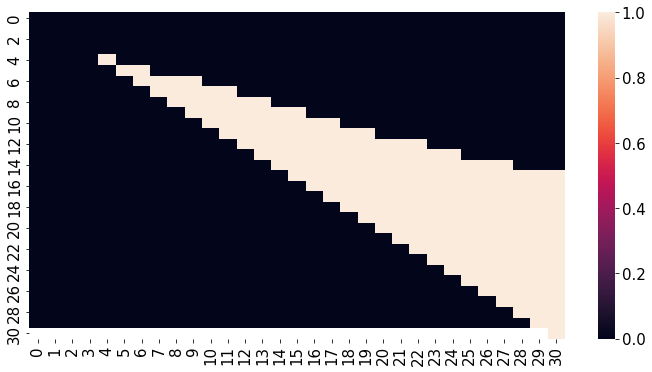

In [22]:
sns.heatmap(treeExer.astype(float));